''' There are differenct sections in this notebook:

(1) General section, where I read csv, create my functions,
    import of libraries...
    
(2) Feature engineer, where I studied and trasformed all variable 
    of dataset and

(3) Feature Selection, where I chooice with ExtraClassifierTree the best
    variables.

(4) Regression part

(5) Classification

(6) Pipeline where there is all code without comments, for a fast execute 
    of it
'''

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [62]:
df = pd.read_csv('movie.csv',sep=",",encoding="ISO-8859-1")

df.head()


,movie_id,movie,region,language,release_year,duration_in_min,genres,numvotes,primaryname,role,birthyear,deathyear,primaryprofession,rating
0,10000,Amor gitano,ES,NaN,1910,NaN,NaN,8,Segundo de Chomón,director,1871.0,1929.0,"director,cinematographer,writer",5.6
1,10001,As in a Looking Glass,US,NaN,1911,NaN,Drama,28,Wilfred Lucas,actor,1871.0,1940.0,"actor,director,writer",5.1
2,10002,The Infant at Snakeville,US,NaN,1911,NaN,NaN,5,Gilbert M. Broncho Billy Anderson,actor,1880.0,1971.0,"director,actor,producer",5.2
3,10003,Who Will Marry Mary?,US,NaN,1913,NaN,"Action,Adventure",14,Mary Fuller,actress,1888.0,1973.0,"actress,writer",5.6
4,10004,The Active Life of Dolly of the Dailies,US,NaN,1914,NaN,Drama,43,Mary Fuller,actress,1888.0,1973.0,"actress,writer",6.2


In [27]:
# exploratory analysis

In [28]:
import missingno as msno

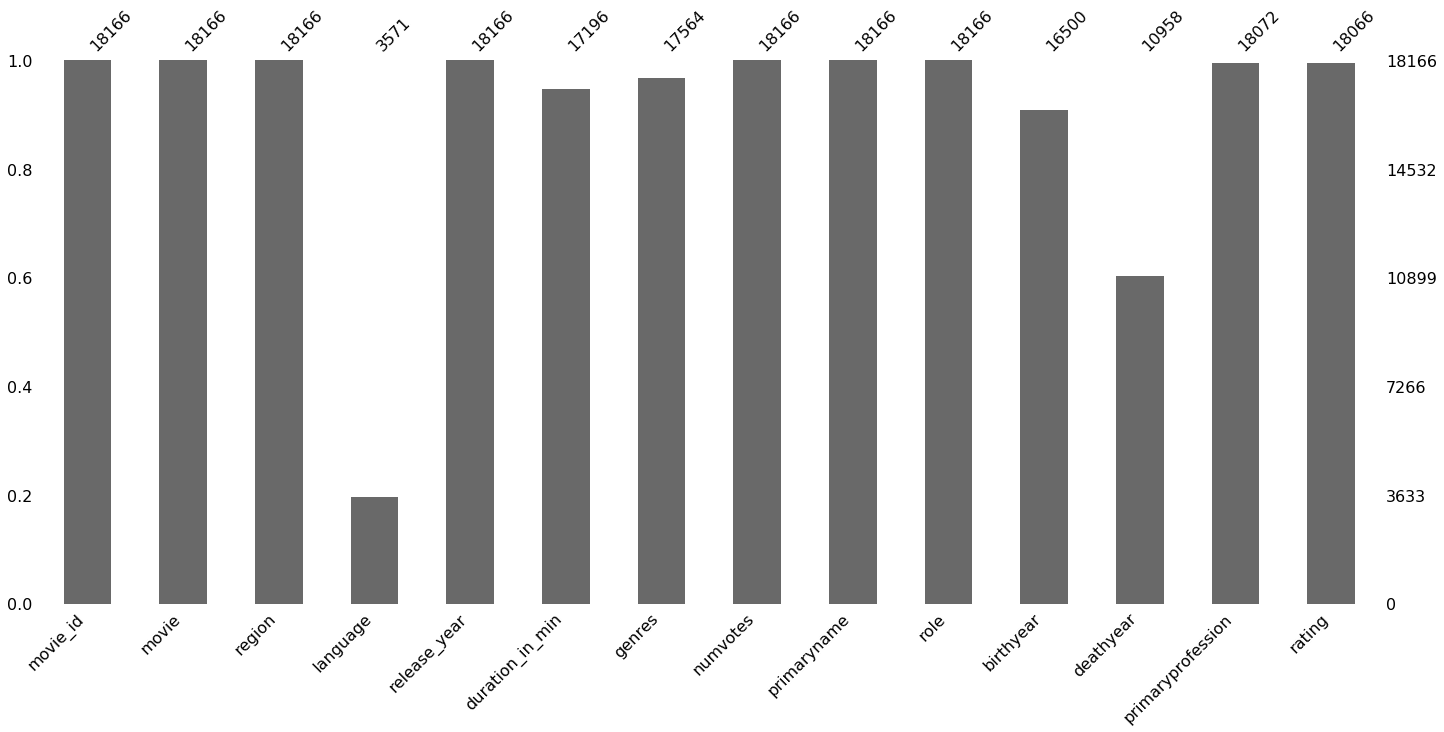

In [29]:
msno.bar(df)

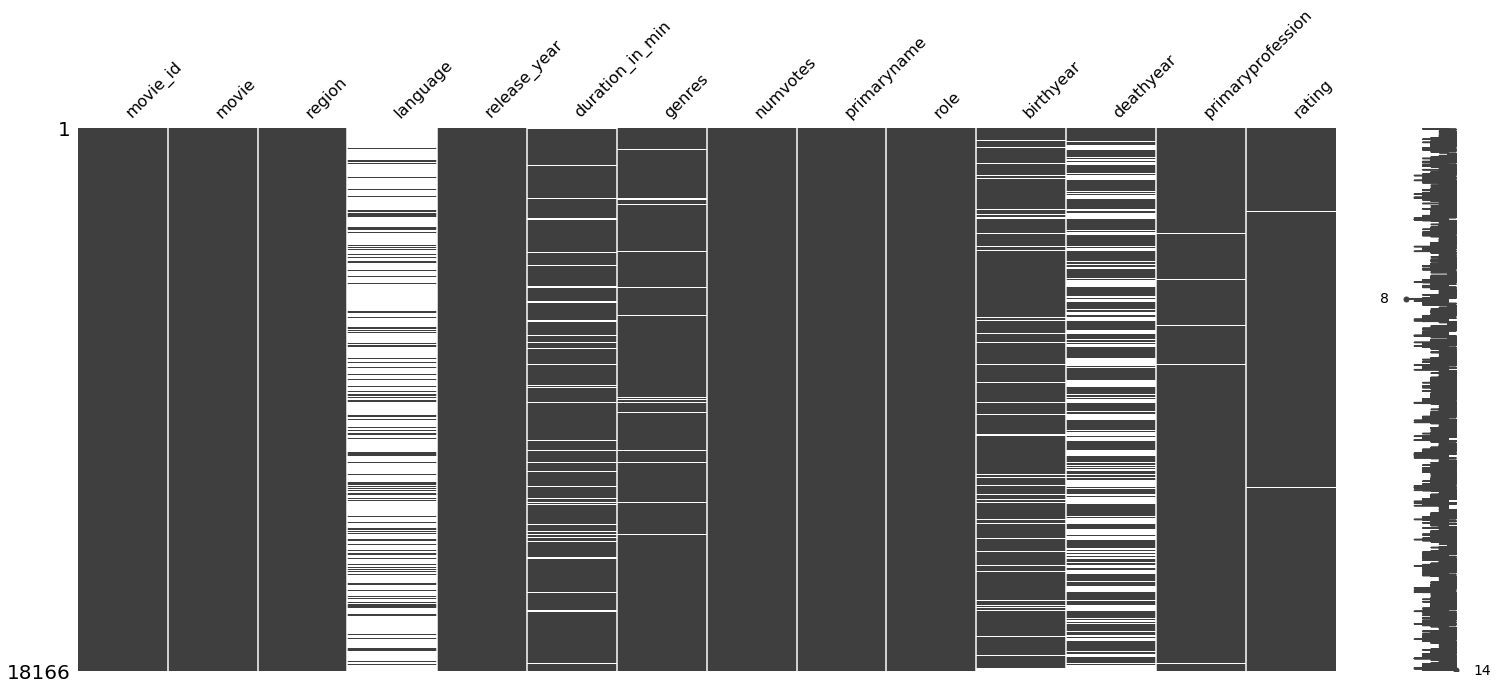

In [30]:
msno.matrix(df) 

In [31]:
#datection outliers

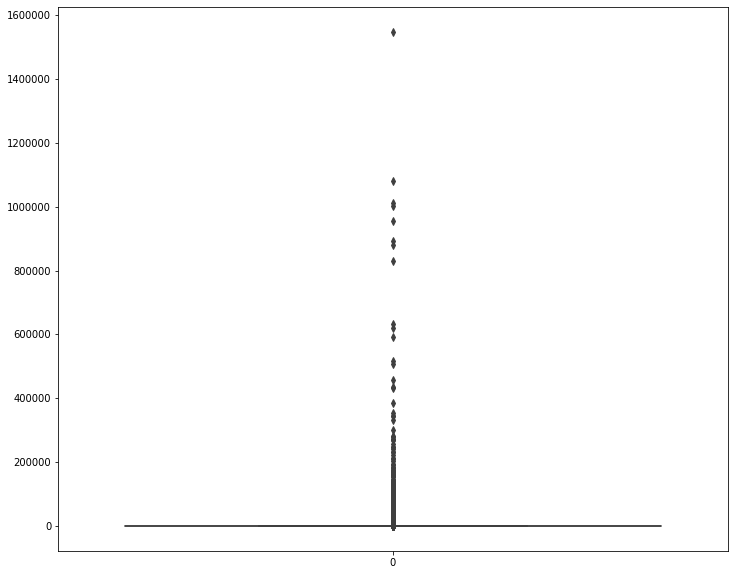

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.boxplot(data=df["numvotes"])

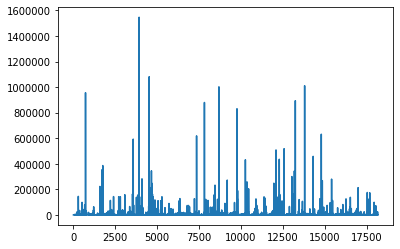

In [38]:
plt.plot(df["numvotes"])

In [44]:
print([df.isnull().sum()/df.count()])
print(df.isnull().sum())

[movie_id             0.000000
movie                0.000000
region               0.000000
language             4.087090
release_year         0.000000
duration_in_min      0.056408
genres               0.034275
numvotes             0.000000
primaryname          0.000000
role                 0.000000
birthyear            0.100970
deathyear            0.657784
primaryprofession    0.005201
rating               0.005535
dtype: float64]
movie_id                 0
movie                    0
region                   0
language             14595
release_year             0
duration_in_min        970
genres                 602
numvotes                 0
primaryname              0
role                     0
birthyear             1666
deathyear             7208
primaryprofession       94
rating                 100
dtype: int64


In [19]:
summary = df.describe()
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
movie_id,18166.0,19082.500000,5244.216831,10000.0,14541.25,19082.5,23623.75,28165.0
release_year,18166.0,1963.769404,23.172771,1897.0,1944.00,1967.0,1985.00,2019.0
duration_in_min,17196.0,89.285066,26.648045,14.0,76.00,89.0,98.00,1428.0
numvotes,18166.0,2603.954806,28003.999571,5.0,22.00,77.0,340.00,1546898.0
birthyear,16500.0,1924.724727,24.676553,1830.0,1906.00,1925.0,1945.00,1990.0
deathyear,10958.0,1984.794944,22.148750,1914.0,1970.00,1987.0,2003.00,2020.0
rating,18066.0,5.974626,1.103099,1.0,5.30,6.1,6.70,9.4


In [20]:
summary

,movie_id,release_year,duration_in_min,numvotes,birthyear,deathyear,rating
count,18166.000000,18166.000000,17196.000000,1.816600e+04,16500.000000,10958.000000,18066.000000
mean,19082.500000,1963.769404,89.285066,2.603955e+03,1924.724727,1984.794944,5.974626
std,5244.216831,23.172771,26.648045,2.800400e+04,24.676553,22.148750,1.103099
min,10000.000000,1897.000000,14.000000,5.000000e+00,1830.000000,1914.000000,1.000000
25%,14541.250000,1944.000000,76.000000,2.200000e+01,1906.000000,1970.000000,5.300000
50%,19082.500000,1967.000000,89.000000,7.700000e+01,1925.000000,1987.000000,6.100000
75%,23623.750000,1985.000000,98.000000,3.400000e+02,1945.000000,2003.000000,6.700000
max,28165.000000,2019.000000,1428.000000,1.546898e+06,1990.000000,2020.000000,9.400000


In [87]:
train

,movie_id,movie,region,language,release_year,duration_in_min,genres,numvotes,primaryname,role,birthyear,deathyear,primaryprofession,rating
56,10056,Captain Fracasse,XWW,en,1929,92.0,"Adventure,Drama",163,Pierre Blanchar,actor,1892.0,1963.0,"actor,director",6.8
66,10066,Trust Your Wife,IE,en,1930,66.0,"Comedy,Crime,Drama",149,Jack Mulhall,actor,1887.0,1979.0,"actor,producer",5.3
128,10128,Un alberg a Tòquio,ES,ca,1935,80.0,Drama,1197,Takeshi Sakamoto,actor,1899.0,1974.0,actor,7.7
130,10130,La bohémienne,BE,fr,1936,71.0,"Comedy,Musical",1744,Stan Laurel,actor,1890.0,1965.0,"actor,writer,soundtrack",6.8
177,10177,Diamond Queen: Diamond Thriller No.7,IN,en,1940,155.0,"Action,Adventure",30,Fearless Nadia,actress,1908.0,1996.0,"actress,stunts,writer",6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18037,28037,In Our Time,XWW,en,1982,106.0,Drama,427,Emily Y. Chang,actress,1953.0,2016.0,actress,7.0
18038,28038,Fellow Citizen,XWW,en,1995,48.0,Documentary,100,Abbas Kiarostami,director,1940.0,2016.0,"writer,director,editor",6.5
18057,28057,The Comedy of Work,XWW,en,1988,90.0,"Adventure,Comedy,Crime",59,Roland Blanche,actor,1943.0,1999.0,actor,6.6
18098,28098,Ghost for Sale,XWW,en,1991,92.0,"Comedy,Horror",22,Ricky Hui,actor,1946.0,2011.0,"actor,music_department",5.4


In [60]:
df=df.dropna()

In [72]:
test = df[df["rating"].isnull()].drop(columns=["rating"])

In [73]:
train= df[~df.index.isin(test.index)]

In [74]:
test = test.dropna()

In [82]:
test

,movie_id,movie,region,language,release_year,duration_in_min,genres,numvotes,primaryname,role,birthyear,deathyear,primaryprofession
2821,12821,"Elisa, My Love",XWW,en,1977,125.0,Drama,591,Fernando Rey,actor,1917.0,1994.0,actor
4450,14450,Tales of the Last Showa Yakuza - Lone Wolf,XWW,en,1966,90.0,"Action,Crime",25,Ken Takakura,actor,1931.0,2014.0,"actor,soundtrack"
5534,15534,Filles dans la nuit,BE,fr,1953,83.0,"Crime,Drama,Film-Noir",53,Harvey Lembeck,actor,1923.0,1982.0,"actor,soundtrack,producer"
6797,16797,The Mikado Project,XWW,en,1983,75.0,Comedy,28,Eddie Constantine,actor,1913.0,1993.0,"actor,soundtrack"
7877,17877,Laube rouge,CA,fr,1984,114.0,"Action,Drama",49795,Patrick Swayze,actor,1952.0,2009.0,"actor,soundtrack,producer"
8778,18778,Le drame de Shanghaï,BE,fr,1938,105.0,Drama,82,Christl Mardayn,actress,1896.0,1971.0,"actress,soundtrack"
8961,18961,Woman,IN,en,1967,149.0,"Comedy,Drama",51,Padmini,actress,1932.0,2006.0,"actress,director,producer"
9869,19869,Les hommes volants,BE,fr,1938,105.0,"Action,Drama,War",119,Fred MacMurray,actor,1908.0,1991.0,"actor,soundtrack,producer"
10232,20232,A Bad Son,XWW,en,1980,110.0,Drama,888,Patrick Dewaere,actor,1947.0,1982.0,"actor,composer,music_department"
11313,21313,Deadly Harvest,CA,fr,1977,87.0,"Drama,Sci-Fi",231,Clint Walker,actor,1927.0,2018.0,"actor,soundtrack"


In [75]:
train = train.dropna()

In [80]:
train

,movie_id,movie,region,language,release_year,duration_in_min,genres,numvotes,primaryname,role,birthyear,deathyear,primaryprofession,rating
56,10056,Captain Fracasse,XWW,en,1929,92.0,"Adventure,Drama",163,Pierre Blanchar,actor,1892.0,1963.0,"actor,director",6.8
66,10066,Trust Your Wife,IE,en,1930,66.0,"Comedy,Crime,Drama",149,Jack Mulhall,actor,1887.0,1979.0,"actor,producer",5.3
128,10128,Un alberg a Tòquio,ES,ca,1935,80.0,Drama,1197,Takeshi Sakamoto,actor,1899.0,1974.0,actor,7.7
130,10130,La bohémienne,BE,fr,1936,71.0,"Comedy,Musical",1744,Stan Laurel,actor,1890.0,1965.0,"actor,writer,soundtrack",6.8
177,10177,Diamond Queen: Diamond Thriller No.7,IN,en,1940,155.0,"Action,Adventure",30,Fearless Nadia,actress,1908.0,1996.0,"actress,stunts,writer",6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18037,28037,In Our Time,XWW,en,1982,106.0,Drama,427,Emily Y. Chang,actress,1953.0,2016.0,actress,7.0
18038,28038,Fellow Citizen,XWW,en,1995,48.0,Documentary,100,Abbas Kiarostami,director,1940.0,2016.0,"writer,director,editor",6.5
18057,28057,The Comedy of Work,XWW,en,1988,90.0,"Adventure,Comedy,Crime",59,Roland Blanche,actor,1943.0,1999.0,actor,6.6
18098,28098,Ghost for Sale,XWW,en,1991,92.0,"Comedy,Horror",22,Ricky Hui,actor,1946.0,2011.0,"actor,music_department",5.4


In [77]:
from sklearn.model_selection import train_test_split

In [88]:
X = train.drop(columns=["rating"])
Y = train["rating"]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.33, random_state=69)

In [92]:
X_train

,movie_id,movie,region,language,release_year,duration_in_min,genres,numvotes,primaryname,role,birthyear,deathyear,primaryprofession
6008,16008,Marked for Murder,IN,en,1945,58.0,"Comedy,Music,Western",50,Tex Ritter,actor,1905.0,1974.0,"soundtrack,actor,music_department"
6265,16265,Le prince et le pauvre,BE,fr,1977,113.0,"Adventure,Comedy,Drama",1556,Oliver Reed,actor,1938.0,1999.0,"actor,soundtrack"
15752,25752,Le tueur est en ville,BE,fr,1953,79.0,"Romance,Western",856,Audie Murphy,actor,1924.0,1971.0,"actor,producer,writer"
6770,16770,The First Polka,XWW,en,1979,96.0,Drama,17,Maria Schell,actress,1926.0,2005.0,"actress,soundtrack,producer"
3908,13908,Catherine and Her Children,XWW,en,1975,80.0,Drama,6,Zora Rozsypalová,actress,1922.0,2010.0,actress
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,14627,"Partir, revenir",CA,fr,1985,114.0,"Drama,War",221,Annie Girardot,actress,1931.0,2011.0,"actress,soundtrack,producer"
5034,15034,Trois sur un sofa,CA,fr,1966,109.0,"Comedy,Romance",910,Jerry Lewis,actor,1926.0,2017.0,"actor,writer,director"
7357,17357,Noedebo Vicarage,XWW,en,1934,96.0,Family,47,Hans Egede Budtz,actor,1889.0,1968.0,actor
14415,24415,If I Were Rich,XWW,en,1941,76.0,Drama,11,Amanda Ledesma,actress,1911.0,2000.0,actress


# lineare regression/

In [93]:
from sklearn.linear_model import LinearRegression

In [104]:
# feature adapotation for regression
df['movie'].value_counts()

Othello                                  6
Lola                                     6
The Hound of the Baskervilles            5
Easy Money                               4
The Unknown                              4
                                        ..
Les amies de ma femme                    1
Back to Back, Face to Face               1
Goodbye Little One                       1
Nefele and the Seductresses of Lesbos    1
Mystery Files                            1
Name: movie, Length: 17630, dtype: int64

In [129]:

X.columns


Index(['movie_id', 'movie', 'region', 'language', 'release_year',
       'duration_in_min', 'genres', 'numvotes', 'primaryname', 'role',
       'birthyear', 'deathyear', 'primaryprofession'],
      dtype='object')

In [107]:
X_dummy = pd.get_dummies(X, columns=['movie','region','language','genres','primaryname','role','primaryprofession'])

In [120]:
Y_dummy = pd.get_dummies(Y, columns = Y.columns())

AttributeError: 'Series' object has no attribute 'columns'

In [113]:
X_dummy
X_train, X_test, y_train, y_test = train_test_split(
X_dummy, Y, test_size=0.33, random_state=69)

In [114]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

1.0

In [115]:
reg.coef_

array([-1.13232002e-05, -1.12739544e-02,  9.48712858e-03, ...,
       -5.67389481e-02,  6.96320723e-03,  1.07130948e-01])

In [116]:
reg.intercept_

24.14044696922327

In [130]:
reg.predict(X_test)

array([7.63459621, 6.79508124, 6.54241881, 6.87700751, 5.71991004,
       6.51701737, 6.20759022, 6.04514102, 5.57880544, 6.21589497,
       6.40290258, 5.77512883, 6.51692799, 6.56307748, 6.32668512,
       5.4819265 , 5.98568646, 6.18367034, 6.33884499, 6.7760953 ,
       5.98650985, 6.04793227, 5.91707911, 5.97672222, 6.07156853,
       6.70934686, 6.00513206, 7.00497601, 5.53778338, 6.17051482,
       6.55057821, 6.3297032 , 6.37986914, 6.46022734, 6.06636819,
       5.76716232, 6.61607036, 6.74744992, 6.43745675, 5.64383715,
       5.3459983 , 6.12250487, 6.52731581, 6.46916783, 6.12189929,
       5.00237472, 6.30239005, 6.08057368, 6.09615998, 6.42089955,
       6.07469435, 6.3224512 , 7.02895524, 6.45104521, 7.83238216,
       5.66825175, 5.84608602, 6.45493815, 6.112434  , 6.10650983,
       6.69064241, 6.24437208, 6.90053856, 6.26476905, 6.53831647,
       6.99575519, 5.6186843 , 6.44498705, 6.43449028, 6.93490761,
       6.61656007, 6.61077059, 6.41347391, 6.33870824, 6.51520